<center><h1>Data Analysis<h1><center>

---

In [4]:
from Metrics import getSentiment, getQuoteBased, getSensationalized, getMudslinging, getSpin, getInformal
import json
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\britt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
print("Loading File")
file = open("rust-articles-backup.json", encoding="utf8")
articles = pd.DataFrame.from_dict(json.load(file))
print("File Loaded")

Loading File
File Loaded


In [6]:
# print(articles['publisher'].value_counts())
# print(articles['categories'].value_counts())
print(articles.columns)
print(len(articles))
# print(articles['body'][articles['categories'].str.contains('leonardo dicaprio')].reset_index(drop=True)[1])
# print(articles['body'][articles['categories'].str.contains('opinion')].reset_index(drop=True)[1])

Index(['url', 'publisher', 'headline', 'twitterHeadline', 'description',
       'categories', 'body', 'images', 'thumbnail', 'videos', 'datePublished',
       'dateUpdated', 'dateParsed'],
      dtype='object')
161225


Get All Metrics

In [7]:
"""for i in range(len(articles)):
    if i % 10000 == 0:
        print(i,len(articles))
    articles.at[i,'sentiment'] = getSentiment(articles.at[i,'body'])
    articles.at[i,'quoteBased'] = getQuoteBased(articles.at[i,'body'])
    articles.at[i,'sensationalized'] = getSensationalized(articles.at[i,'body'])
    articles.at[i,'mudslinging'] = getMudslinging(articles.at[i,'body'])
    articles.at[i,'spin'] = getSpin(articles.at[i,'body'])
    articles.at[i,'informal'] = getInformal(articles.at[i,'body'])
articles.to_json('rust-articles-backup-metrics.json')"""

print("Loading File")
file = open("rust-articles-backup-metrics.json", encoding="utf8")
metricArticles = pd.DataFrame.from_dict(json.load(file))
print("File Loaded")

print(metricArticles.iloc[0])

Loading File
File Loaded
url                http://news.sky.com/story/102-migrants-interce...
publisher                                                        sky
headline           102 migrants intercepted in Channel - highest ...
twitterHeadline    102 migrants intercepted in Channel - highest ...
description        Border Force stops five boats containing peopl...
categories                                                   uk news
body               More than 100 migrants, including seven childr...
images             [{'alt': 'Small boats used to carry the migran...
thumbnail                                                       None
videos                                                            []
datePublished                               2020-02-07T16:51:00.000Z
dateUpdated                                 2020-02-07T18:38:00.000Z
dateParsed                                  2020-02-07T20:22:59.000Z
sentiment                                                     0.3091
quoteBase

Get Sentiment Test

In [8]:
sentiment = []
for i in range(10):
    score = getSentiment(articles.at[i,'body'])
    articles.at[i,'sentiment'] = score
    sentiment.append(score)

Get Quotebased Test

In [9]:
count = 0
total = 0
opp = []
o = articles[articles['categories'].str.contains('opinion')].reset_index(drop=True)
for i in range(len(o)):
    quoteBased = getQuoteBased(o.at[i,'body'])
    # print(ob.at[i,'body'])
    # print(quoteBased)
    count += 1
    total += quoteBased
    opp.append(quoteBased)
print('Opinion:',count, round(total/count,5))

count = 0
total = 0
fac = []
f = articles[~articles['categories'].str.contains('opinion')].reset_index(drop=True)
for i in range(len(f)):
    quoteBased = getQuoteBased(f.at[i,'body'])
    # print(fb.at[i,'body'])
    # print(quoteBased)
    count += 1
    total += quoteBased
    fac.append(quoteBased)
print('Fact:',count, round(total/count,5))

count = 0
total = 0
quoteBased = []
for i in range(len(articles)):
    score = getQuoteBased(articles.at[i,'body'])
    # print(fb.at[i,'body'])
    # print(quoteBased)
    count += 1
    total += score
    quoteBased.append(score)
print('All:',count, round(total/count,5))

Opinion: 1840 0.13374
Fact: 159385 0.17788
All: 161225 0.17737


Get Sensationalized Test

In [10]:
sensationalized = []
for i in range(len(articles)):
    score = getSensationalized(articles.at[i,'body'])
    sensationalized.append(score)

Get Mudslinging Test

In [11]:
mudslinging = []
for i in range(len(articles)):
    score = getMudslinging(articles.at[i,'body'])
    mudslinging.append(score)

Get Spin Test

In [12]:
spin = []
for i in range(len(articles)):
    score = getSpin(articles.at[i,'body'])
    spin.append(score)

Get Informal Test

In [13]:
informal = []
#for i in range(len(articles)):
for i in range(2000):
    score = getInformal(articles.at[i,'body'])
    informal.append(score)

{0.3: 1, 0.5: 1, 1.0: 5, 0.0: 1, 0.1: 1, 0.6: 1}


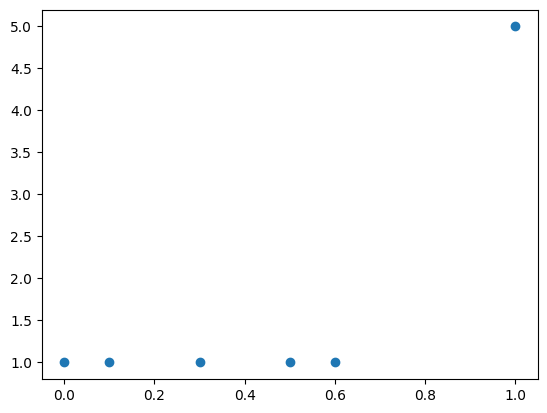

In [14]:
grouped = {}
for score in sentiment:
    try:
        grouped[round(score,1)] += 1
    except:
        grouped[round(score,1)] = 1

print(grouped)
plt.scatter(*zip(*grouped.items()))
plt.show()

{0.5: 10644, 0.2: 16062, 1: 219, 0.4: 15993, 0.3: 18021, 0.1: 14181, 0.0: 76160, 0.7: 2658, 0.6: 5787, 0.8: 1079, 0.9: 421}


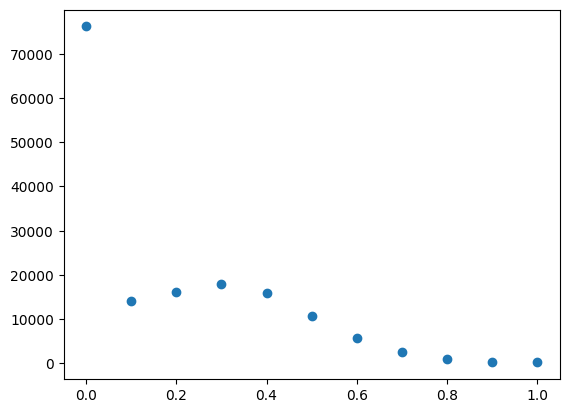

In [15]:
grouped = {}
for score in quoteBased:
    try:
        grouped[round(score,1)] += 1
    except:
        grouped[round(score,1)] = 1

print(grouped)
plt.scatter(*zip(*grouped.items()))
plt.show()

{0.0: 123892, 0.1: 32381, 0.2: 3887, 0.3: 787, 0.8: 5, 1: 1, 0.7: 8, 0.6: 20, 0.5: 60, 0.4: 183, 0.9: 1}


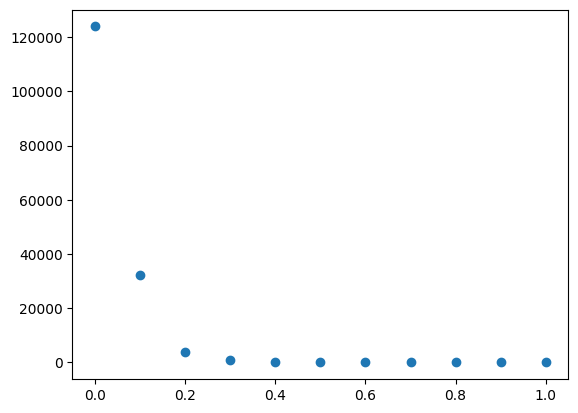

In [16]:
grouped = {}
for score in sensationalized:
    try:
        grouped[round(score,1)] += 1
    except:
        grouped[round(score,1)] = 1

print(grouped)
plt.scatter(*zip(*grouped.items()))
plt.show()

{0.1: 55608, 0.2: 8264, 0.0: 95313, 0.3: 1494, 0.5: 102, 0.7: 25, 0.4: 363, 0.9: 5, 0.6: 40, 0.8: 11}


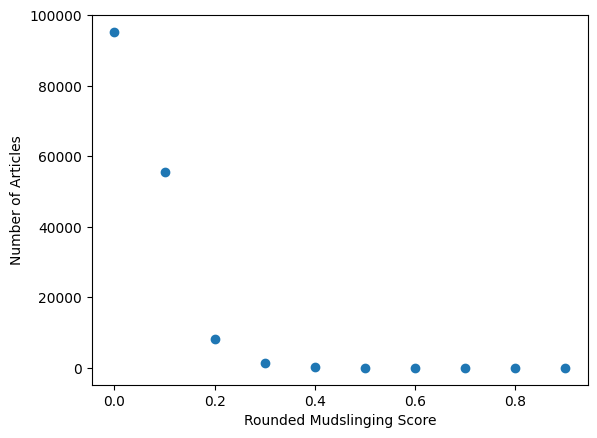

In [22]:
grouped = {}
for score in mudslinging:
    try:
        grouped[round(score,1)] += 1
    except:
        grouped[round(score,1)] = 1

print(grouped)
plt.scatter(*zip(*grouped.items()))
plt.xlabel('Rounded Mudslinging Score')
plt.ylabel('Number of Articles')
plt.show()

{0.0: 43302, 0.2: 31166, 0.1: 78418, 0.8: 3, 0.3: 6742, 0.7: 11, 0.4: 1269, 0.6: 63, 0.5: 243, 0.9: 5, 1.0: 3}


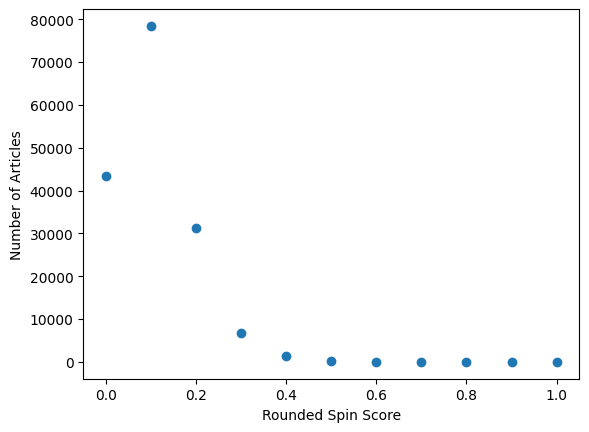

In [23]:
grouped = {}
for score in spin:
    try:
        grouped[round(score,1)] += 1
    except:
        grouped[round(score,1)] = 1

print(grouped)
plt.scatter(*zip(*grouped.items()))
plt.xlabel('Rounded Spin Score')
plt.ylabel('Number of Articles')
plt.show()

{0.1: 1045, 0.2: 653, 0.5: 18, 0.3: 218, 0.4: 61, 0.6: 1, 0.0: 3, 0.7: 1}


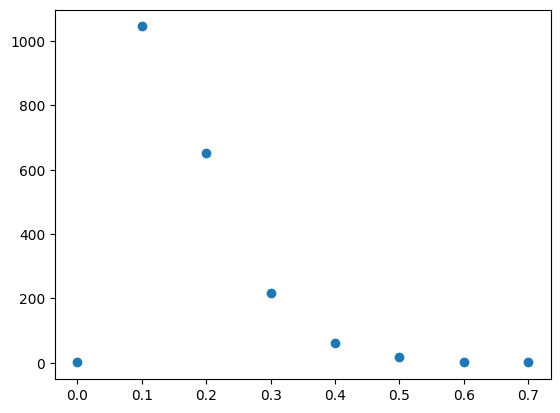

In [19]:
grouped = {}
for score in informal:
    try:
        grouped[round(score,1)] += 1
    except:
        grouped[round(score,1)] = 1

print(grouped)
plt.scatter(*zip(*grouped.items()))
plt.show()

Regression Testing

In [20]:
from sklearn.linear_model import LinearRegression

training_x = pd.DataFrame([1,10,1,10])
training_y = pd.DataFrame([1,0,1,0])
testing_x = pd.DataFrame([2])

model = LinearRegression().fit(training_x.to_numpy(), training_y.to_numpy().ravel())
result = pd.DataFrame(model.predict(testing_x.to_numpy()))
result

,0
0,0.888889
